# 📊 Market Index & Factor Analysis
This notebook analyzes the correlation between market index returns and factor-based returns.

## ⚙️ Step 0: Install Required Libraries

In [1]:
# Install required Python packages
# Run this cell only once if packages are not already installed
# You can remove the '--quiet' flag if you want to see full installation logs
!pip install pandas numpy statsmodels matplotlib seaborn --quiet

## Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

## Step 2: Define Input File Paths

In [3]:
# Customize your file paths here
index_file_path = r"C:/Users/ajinv/Downloads/sp_index.xlsx"
factor_file_path = r"C:/Users/ajinv/Downloads/[usa]_[all_factors]_[monthly]_[ew]/[usa]_[all_factors]_[monthly]_[ew].csv"

## Step 3: Load and Clean Index Data

In [4]:
# Load the S&P index Excel file, skipping first 2 header rows
df_index = pd.read_excel(index_file_path, header=2).iloc[:,1:]
df_index = df_index.sort_index(ascending=False).reset_index(drop=True)
df_index.head()

,Date,Value
0,2020-05-31,0.0453
1,2020-06-30,0.0184
2,2020-07-31,0.0551
3,2020-08-31,0.0701
4,2020-09-30,-0.0392


## Step 4: Load and Filter Factor Data

In [5]:
# Load the US factor return data from CSV
df_factor = pd.read_csv(factor_file_path)
df_factor1 = df_factor[['name', 'date', 'ret']]
df_factor1.head()

,name,date,ret
0,age,1926-03-31,-0.066167
1,age,1926-04-30,0.010546
2,age,1926-05-31,-0.020292
3,age,1926-06-30,-0.008927
4,age,1926-07-31,0.017724


## Step 5: Select Top 10 Most Frequent Factors

In [6]:
# Identify the top 10 most frequently occurring factor names
top_factors = list(df_factor1['name'].value_counts().index[:10])
df_factor2 = df_factor1[df_factor1['name'].isin(top_factors)]
df_factor2.head()

,name,date,ret
14999,bidaskhl_21d,1926-02-28,-0.018325
15000,bidaskhl_21d,1926-03-31,-0.051434
15001,bidaskhl_21d,1926-04-30,-0.012080
15002,bidaskhl_21d,1926-05-31,-0.019390
15003,bidaskhl_21d,1926-06-30,-0.001184


## Step 6: Filter Matching Years Between Index and Factors

In [7]:
# Extract year from date to match index with factor data
index_years = df_index['Date'].apply(lambda x: x.year)
# Extract year from date to match index with factor data
factor_years = df_factor2['date'].apply(lambda x: int(x[:4]))
df_factor3 = df_factor2[factor_years.isin(index_years)]
df_factor3['new_date'] = df_factor3['date'].str[:7]

C:\Users\ajinv\AppData\Local\Temp\ipykernel_20712\1921402419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor3['new_date'] = df_factor3['date'].str[:7]


## Step 7: Add Year-Month to Index Data for Merging

In [8]:
df_index['value_date'] = df_index['Date'].apply(lambda x: str(x)[:7])

## Step 8: Analyze Correlation Between Index and One Factor

In [9]:
factor_idx = 1
selected_factor = top_factors[factor_idx]
df_single_factor = df_factor3[df_factor3['name'] == selected_factor]
merged_data = pd.merge(df_index, df_single_factor, left_on='value_date', right_on='new_date', how='inner')
merged_data = merged_data.rename(columns={
    'Value': 'index_return',
    'ret': 'factor_return',
    'new_date': 'year_month',
    'name': 'factor_name'
})
df_analysis = merged_data[['factor_name', 'year_month', 'index_return', 'factor_return']]
df_analysis.head()

,factor_name,year_month,index_return,factor_return
0,prc,2020-05,0.0453,0.003177
1,prc,2020-06,0.0184,0.089170
2,prc,2020-07,0.0551,-0.008800
3,prc,2020-08,0.0701,-0.001199
4,prc,2020-09,-0.0392,-0.008533


## Step 9: Correlation and Linear Regression

In [10]:
# Calculate Pearson correlation coefficient between index and factor return
correlation = np.corrcoef(df_analysis['index_return'], df_analysis['factor_return'])[0, 1]
print(f"Correlation between index return and {selected_factor}: {correlation:.4f}")

df_analysis['intercept'] = 1
# Fit an Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(df_analysis['index_return'], df_analysis[['factor_return', 'intercept']])
results = model.fit()
results.summary()

Correlation between index return and prc: 0.0366


C:\Users\ajinv\AppData\Local\Temp\ipykernel_20712\3874978804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           index_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                   0.06422
Date:                Fri, 04 Apr 2025   Prob (F-statistic):              0.801
Time:                        15:19:43   Log-Likelihood:                 80.532
No. Observations:                  50   AIC:                            -157.1
Df Residuals:                      48   BIC:                            -153.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
factor_return     0.0361      0.143      0.253      0.801      -0.250       0.323
intercept         0.0140      0.007      1.996      0.052      -0.000       0.028
==============================================================================
Omnibus:                        2.325   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.036
Skew:                          -0.382   Prob(JB):                        0.361
Kurtosis:                       2.371   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 10: Compute Correlation for All Top 10 Factors

In [11]:
correlations = {}
for factor in top_factors:
    df_temp = df_factor3[df_factor3['name'] == factor]
    merged = pd.merge(df_index, df_temp, left_on='value_date', right_on='new_date', how='inner')
# Calculate Pearson correlation coefficient between index and factor return
    correlations[factor] = np.corrcoef(merged['ret'], merged['Value'])[0, 1]
correlations

{'market_equity': -0.03661566197476467,
 'prc': 0.03655348994442935,
 'rmax1_21d': -0.45424160439929284,
 'ret_1_0': 0.32086739478531495,
 'zero_trades_21d': -0.46486248425889504,
 'iskew_capm_21d': -0.03258839502205846,
 'ivol_capm_21d': -0.43600186581103945,
 'rvol_21d': -0.47337054013105895,
 'rskew_21d': -0.07450875269384935,
 'bidaskhl_21d': 0.4332225895299212}

## Step 11: Identify Most Correlated Factor

In [12]:
max_corr = max([abs(v) for v in correlations.values()])
most_correlated_factors = [k for k, v in correlations.items() if abs(v) == max_corr]
most_correlated_factors

['rvol_21d']

## 📊 Step 12: Visualize Correlation Between Index and Factor Returns

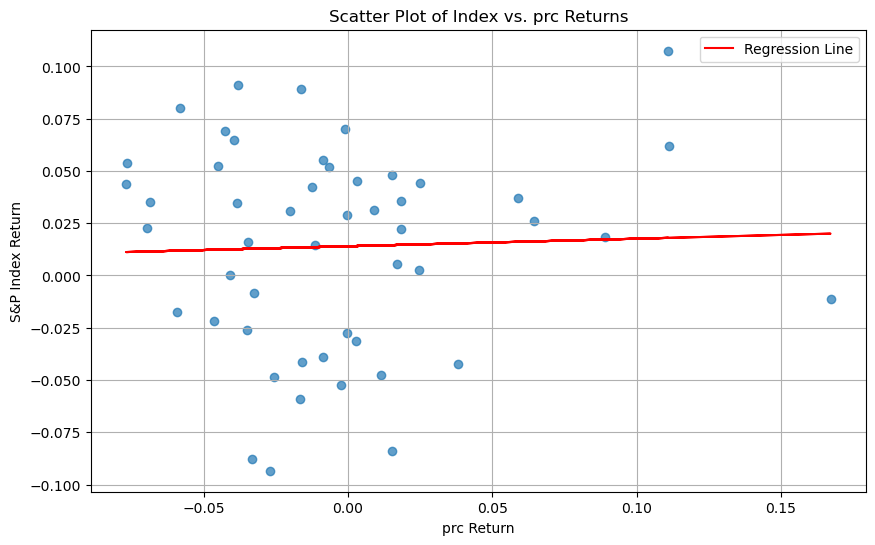

In [13]:
import matplotlib.pyplot as plt

# Plot the scatter plot with a regression line
# Plotting section
plt.figure(figsize=(10, 6))
# Plotting section
plt.scatter(df_analysis['factor_return'], df_analysis['index_return'], alpha=0.7)
# Plotting section
plt.title(f"Scatter Plot of Index vs. {selected_factor} Returns")
# Plotting section
plt.xlabel(f"{selected_factor} Return")
# Plotting section
plt.ylabel("S&P Index Return")

# Fit a regression line
m, b = np.polyfit(df_analysis['factor_return'], df_analysis['index_return'], 1)
# Plotting section
plt.plot(df_analysis['factor_return'], m * df_analysis['factor_return'] + b, color='red', label='Regression Line')
# Plotting section
plt.legend()
# Plotting section
plt.grid(True)
# Plotting section
plt.show()

## 📊 Step 13: Visualize All Factor Correlations

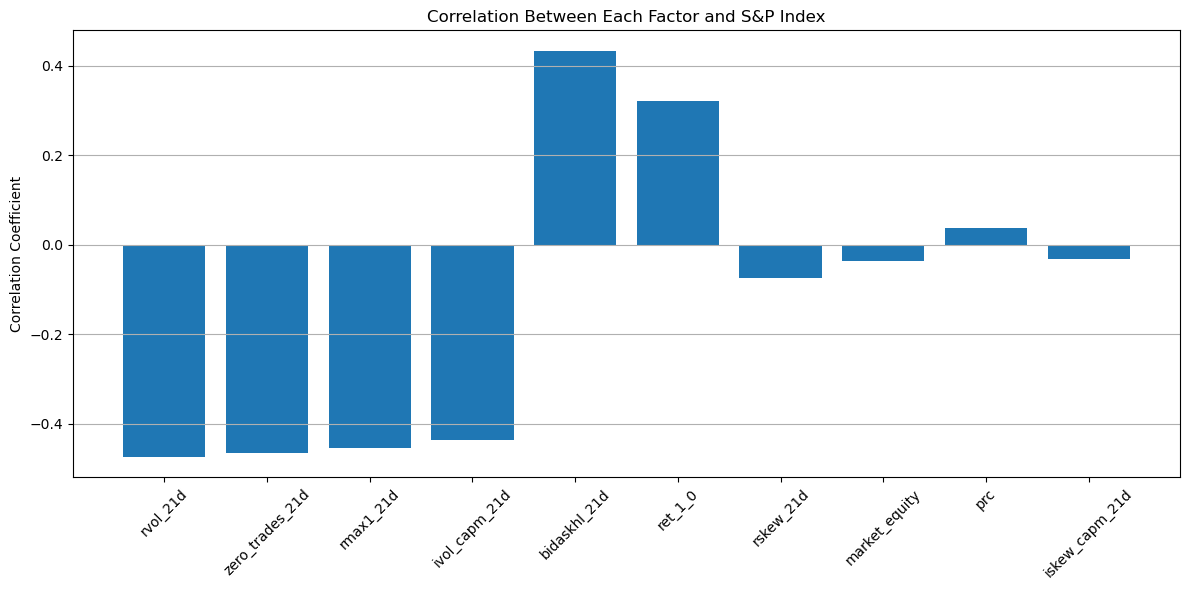

In [14]:
# Bar plot of all factor correlations
# Plotting section
plt.figure(figsize=(12, 6))
sorted_corr = dict(sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True))
# Plotting section
plt.bar(sorted_corr.keys(), sorted_corr.values())
# Plotting section
plt.title("Correlation Between Each Factor and S&P Index")
# Plotting section
plt.ylabel("Correlation Coefficient")
# Plotting section
plt.xticks(rotation=45)
# Plotting section
plt.grid(axis='y')
# Plotting section
plt.tight_layout()
# Plotting section
plt.show()

## 📊 Step 12: Visualizations

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')

### 12.1 Line Plot: Index vs Factor Returns Over Time

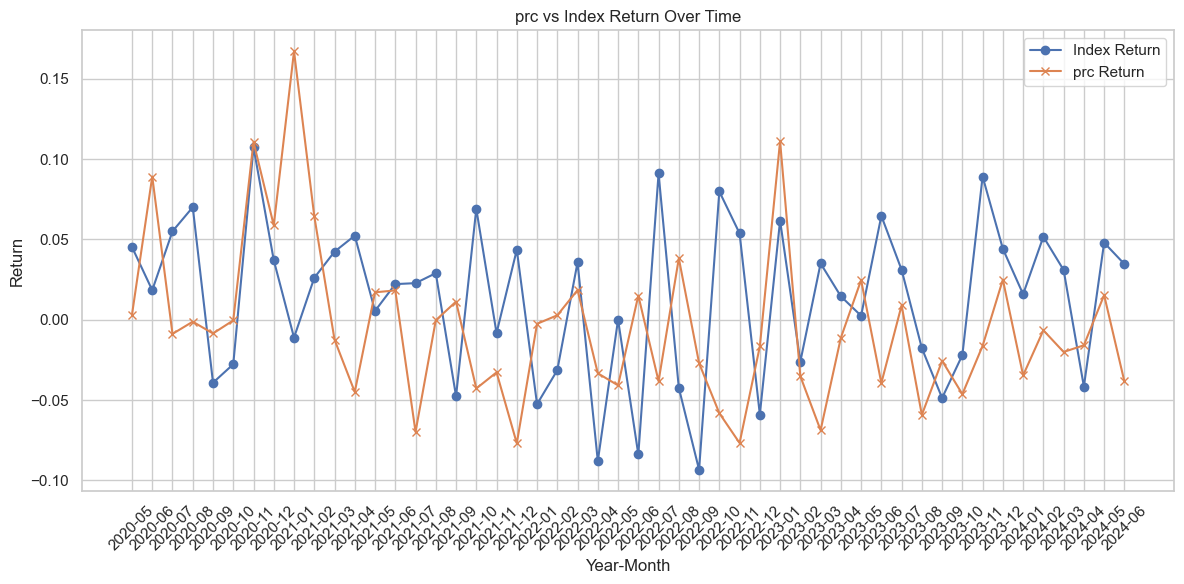

In [16]:
# Plotting section
plt.figure(figsize=(12, 6))
# Plotting section
plt.plot(df_analysis['year_month'], df_analysis['index_return'], label='Index Return', marker='o')
# Plotting section
plt.plot(df_analysis['year_month'], df_analysis['factor_return'], label=f'{selected_factor} Return', marker='x')
# Plotting section
plt.xticks(rotation=45)
# Plotting section
plt.title(f'{selected_factor} vs Index Return Over Time')
# Plotting section
plt.xlabel('Year-Month')
# Plotting section
plt.ylabel('Return')
# Plotting section
plt.legend()
# Plotting section
plt.tight_layout()
# Plotting section
plt.show()

### 12.3 Heatmap: Correlation of Top 10 Factors with Index

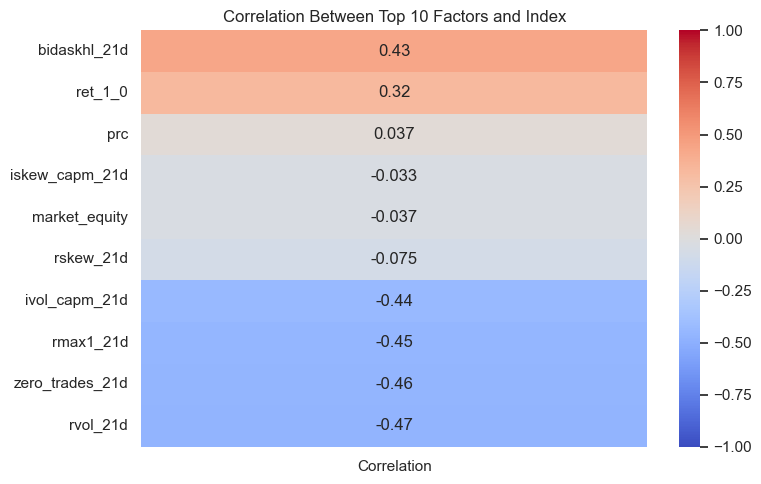

In [18]:
# Convert correlation dictionary to DataFrame for heatmap
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
# Plotting section
plt.figure(figsize=(8, 5))
sns.heatmap(corr_df.sort_values(by='Correlation', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Plotting section
plt.title('Correlation Between Top 10 Factors and Index')
# Plotting section
plt.tight_layout()
# Plotting section
plt.show()